In [3]:
title = 'Days of our lives\n'
root = '/home/bob/projects/Web3HackerNetwork'
dataset_dir = root + "/data/github/2022-04-07-marine-search"
stats_dir = dataset_dir + "/projects"

### read the stats from JSON on disk

In [4]:
import json
in_path = dataset_dir + "/all_repo_stats.json"
in_stats = json.loads(open(in_path, 'r').read());
print(in_stats[slice(3)])

[{'login': 'PhilippeMts', 'project': 'hackfs-fragment', 'num_files': 156, 'num_commits': 396, 'num_locs': 26906, 'num_rust_files': 1, 'num_react_files': 39, 'num_markdown_files': 7, 'num_binary_files': 36, 'num_rust_locs': 26, 'num_react_locs': 8404, 'num_markdown_locs': 532, 'num_binary_bytes': 10912860}, {'login': 'amrosaeed', 'project': 'fluence', 'num_files': 779, 'num_commits': 4, 'num_locs': 402144, 'num_rust_files': 99, 'num_react_files': 114, 'num_markdown_files': 37, 'num_binary_files': 58, 'num_rust_locs': 13854, 'num_react_locs': 19844, 'num_markdown_locs': 12142, 'num_binary_bytes': 7268734}, {'login': 'KirSerz', 'project': 'hackathon_wallet', 'num_files': 53, 'num_commits': 21, 'num_locs': 80798, 'num_rust_files': 3, 'num_react_files': 10, 'num_markdown_files': 3, 'num_binary_files': 4, 'num_rust_locs': 436, 'num_react_locs': 1458, 'num_markdown_locs': 372, 'num_binary_bytes': 87982}]


### convert the raw stats to basic features

In [5]:
for stat in in_stats:
    stat['pct_rust_files'] = stat['num_rust_files'] / stat['num_files']
    stat['pct_react_files'] = stat['num_react_files'] / stat['num_files']
    print(str(stat['pct_rust_files']) + ', ' + str(stat['pct_react_files']))

0.00641025641025641, 0.25
0.12708600770218229, 0.14634146341463414
0.05660377358490566, 0.18867924528301888
0.023255813953488372, 0.3488372093023256
0.011904761904761904, 0.49404761904761907
0.011976047904191617, 0.49700598802395207
0.08333333333333333, 0.0
0.18461538461538463, 0.0
0.18461538461538463, 0.0
0.040983606557377046, 0.5081967213114754
0.029411764705882353, 0.5882352941176471
0.13485477178423236, 0.14522821576763487
0.023809523809523808, 0.16666666666666666
0.12244897959183673, 0.12244897959183673
0.038461538461538464, 0.23076923076923078
0.03686635944700461, 0.5253456221198156
0.12661498708010335, 0.14728682170542637
0.03333333333333333, 0.13333333333333333
0.79375, 0.003125
0.4, 0.02857142857142857
0.45454545454545453, 0.01818181818181818
0.3902439024390244, 0.024390243902439025
0.6395348837209303, 0.023255813953488372
0.1590909090909091, 0.0
0.037037037037037035, 0.25925925925925924
0.8210526315789474, 0.0
0.13485477178423236, 0.14522821576763487
0.18604651162790697, 0.02

In [6]:
print(in_stats[slice(2)])

[{'login': 'PhilippeMts', 'project': 'hackfs-fragment', 'num_files': 156, 'num_commits': 396, 'num_locs': 26906, 'num_rust_files': 1, 'num_react_files': 39, 'num_markdown_files': 7, 'num_binary_files': 36, 'num_rust_locs': 26, 'num_react_locs': 8404, 'num_markdown_locs': 532, 'num_binary_bytes': 10912860, 'pct_rust_files': 0.00641025641025641, 'pct_react_files': 0.25}, {'login': 'amrosaeed', 'project': 'fluence', 'num_files': 779, 'num_commits': 4, 'num_locs': 402144, 'num_rust_files': 99, 'num_react_files': 114, 'num_markdown_files': 37, 'num_binary_files': 58, 'num_rust_locs': 13854, 'num_react_locs': 19844, 'num_markdown_locs': 12142, 'num_binary_bytes': 7268734, 'pct_rust_files': 0.12708600770218229, 'pct_react_files': 0.14634146341463414}]


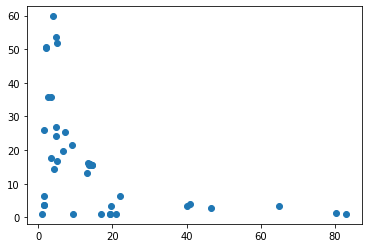

In [7]:
import matplotlib.pyplot as plt
import numpy as np

pct_rust_array = [(1+(100*val['pct_rust_files'])) for val in in_stats]
pct_react_array = [(1+(100*val['pct_react_files'])) for val in in_stats]
xpoints = np.array(pct_rust_array)
ypoints = np.array(pct_react_array)

plt.scatter(xpoints, ypoints)
plt.show()

(array([17.,  3.,  2.,  7.,  4.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([ 0.        ,  4.10526316,  8.21052632, 12.31578947, 16.42105263,
        20.52631579, 24.63157895, 28.73684211, 32.84210526, 36.94736842,
        41.05263158, 45.15789474, 49.26315789, 53.36842105, 57.47368421,
        61.57894737, 65.68421053, 69.78947368, 73.89473684, 78.        ,
        82.10526316]),
 <BarContainer object of 20 artists>)

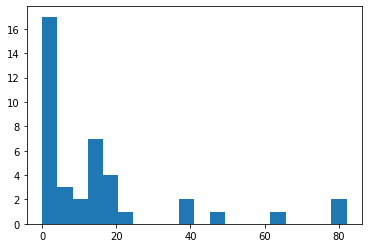

In [12]:
import matplotlib.pyplot as plt
import numpy as np
pct_rust_array = [100*val['pct_rust_files'] for val in in_stats]
plt.hist(np.array(pct_rust_array), 20)

### Lognormalization
I am pretty sure this is a lognormal distribution, though there are not enough datapoints to really see it.

I use log1p which armors against zero values.

(array([ 1.,  0.,  1.,  0.,  2.,  4., 10.,  3.,  1.,  1.,  8.,  2.,  4.,
         2.,  1.]),
 array([1.79175947, 2.11626177, 2.44076406, 2.76526636, 3.08976866,
        3.41427095, 3.73877325, 4.06327555, 4.38777784, 4.71228014,
        5.03678244, 5.36128473, 5.68578703, 6.01028933, 6.33479162,
        6.65929392]),
 <BarContainer object of 15 artists>)

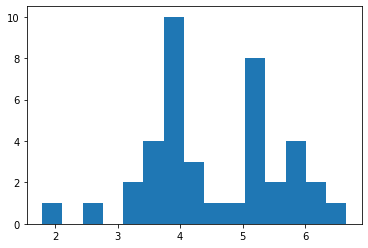

In [11]:
import matplotlib.pyplot as plt
import numpy as np
array = [np.log1p(val['num_files']) for val in in_stats]
#array = [val['num_files'] for val in in_stats]
plt.hist(np.array(array), 15)